In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import vpython as vp, numpy as np, copy

In [25]:
def relax(V, imax=200):  # find self-consistent soln
    for i in range(imax):
        V[1:-1, 1:-1] = (V[1:-1, :-2] + V[1:-1, 2:]  # left, right
                         + V[:-2, 1:-1] + V[2:, 1:-1]) / 4  # top, bottom
        V = set_boundary(V)  # enforce boundary condition
        #draw_pot(V), vp.rate(1000)
    return V


def set_boundary(V):  # set interior BC values
    V[w:2 * w, top], V[w:2 * w, bot] = 1., -1.  # plates voltage
    return V


def draw_pot(V):  # refresh potential, slow version
    for i in range(M):
        for j in range(N):
            q = abs(V[i, j])  # graduated color mix
            if (V[i, j] > 0):
                grid.color[N * i + j] = (q, .5 * q, .2 * q)
            else:
                grid.color[N * i + j] = (.2 * q, .5 * q, q)


def draw_efield(V, scale):  # draw electric field
    Ex, Ey = np.gradient(-V)
    """
    Emag = np.sqrt(Ex * Ex + Ey * Ey)
    for i in range(2, M - 1, 2):
        for j in range(2, N - 1, 2):
            vp.arrow(pos=(i, j), axis=(Ex[i, j], Ey[i, j]),
                     length=Emag[i, j] * scale)
        vp.rate(100)
    """
    return Ex, Ey

In [26]:
M, N, s = 61, 61, 10  # M x N = grid dim, s = point size
w, d, h = M // 3, N // 6, N // 2  # plates width, separation, half N
bot, top = h - d // 2, h + d // 2  # bottom and top plates

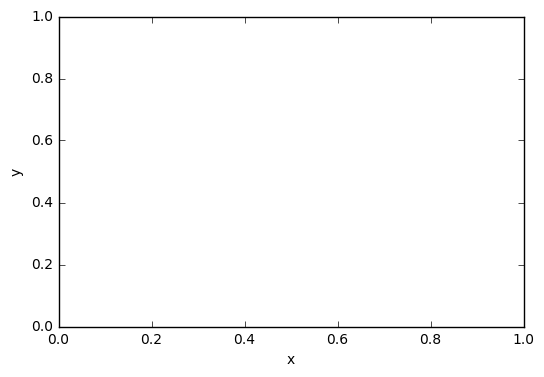

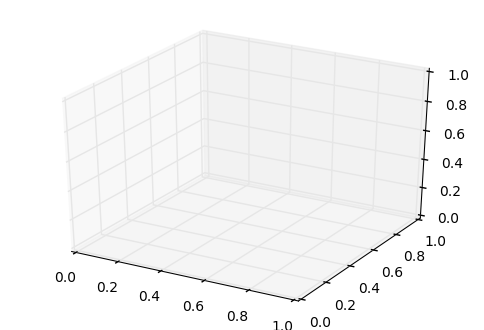

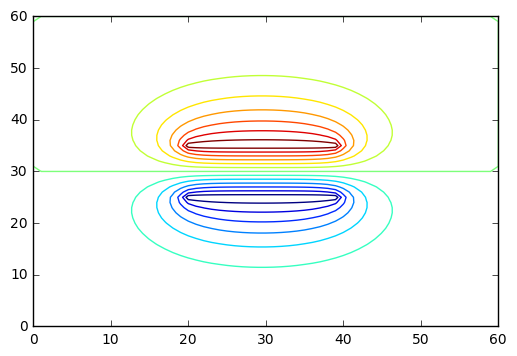

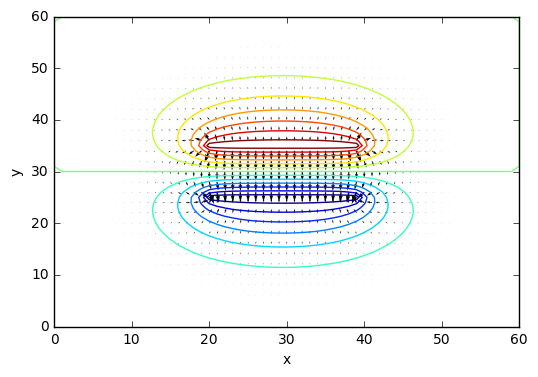

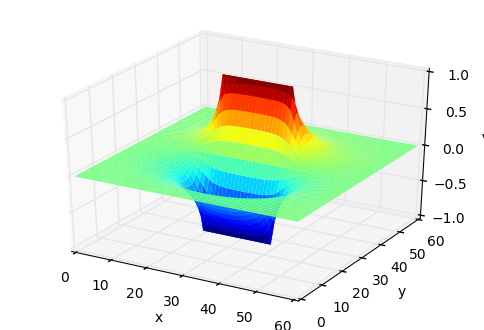

In [27]:
"""
scene = vp.display(width=M * s, height=N * s, center=(M // 2, N // 2))
grid = vp.points(pos=[(i, j) for i in range(M) for j in range(N)],  # grid
                 color=[vp.vector(0, 0, 0) for _ in range(M * N)], size=s, shape='square')
"""
V = np.zeros((M, N))  # initialze V on grid, apply BC
V = set_boundary(V)
V = relax(V)  # solve by relaxation

Ex, Ey = draw_efield(V, scale=16)
V, Ex, Ey = np.transpose(V), np.transpose(Ex), np.transpose(Ey)
#V = np.transpose(V)
X, Y = np.meshgrid(range(M), range(N))

plt.figure()  # Fig.1, contour plot
plt.contour(V, 14)
plt.quiver(X[::2, ], Y[::2, ], Ex[::2, ], Ey[::2, ],  # stride 2 in y dir
           width=0.004, minshaft=1.5, minlength=0, scale=10.)
plt.xlabel('x'), plt.ylabel('y')

plt.figure()  # Fig.2, surface plot
ax = plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, V, rstride=1, cstride=1, cmap=plt.cm.jet, lw=0)
ax.set_xlabel('x'), ax.set_ylabel('y'), ax.set_zlabel('V')
plt.show()

In [28]:
vp.color.black

<0.000000, 0.000000, 0.000000>

In [29]:
vp.color.red

<1.000000, 0.000000, 0.000000>

In [33]:
vp.points(pos=[(-1,0,0), (1,0,0)], size=50, color=vp.color.red)

AttributeError: 'points' object has no attribute '_size'